In [13]:
import pandas as pd
from mistletoe import Document, HTMLRenderer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data_table = {
('Task', 'SED'):['20'],
('Task', 'VAD'):['49']
}
pd.DataFrame().from_dict(train_data_table)

Task    
   SED VAD
0   20  49

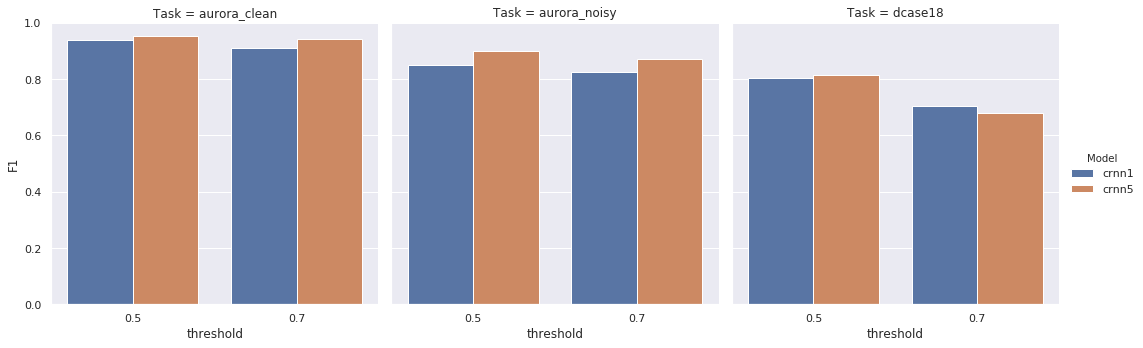

In [48]:
vad_thres_05_01 = 'result_tables/threshold_05_01.md'
vad_thres_07_02 = 'result_tables/threshold_075_02.md'
def read_tables(report_md):
    res = []
    with open(report_md, 'r') as fin:
        with HTMLRenderer() as renderer:
            rendered = renderer.render(Document(fin))
            tables = pd.read_html(rendered)
            for table_id, table in enumerate(tables):
                table['id'] = table_id
                res.append(table)
    return pd.concat(res)
thres_05 = read_tables(vad_thres_05_01)
thres_05['threshold'] = 0.5
thres_07 = read_tables(vad_thres_07_02)
thres_07['threshold'] = 0.7
df = pd.concat((thres_05, thres_07),axis=0)
df=df[(df['Traindata'] == 'balanced') & (df['id'] == 0)]# macro only
del df['id']
del df['Traindata']
sns.set()
sns.catplot(data=df, kind='bar', x='threshold',y='F1',hue='Model',col='Task')

In [49]:
print(df[(df['Model'] == 'crnn5') & (df['threshold'] == 0.5)][['Task','F1','Pre','Rec']].to_latex(index=False))

\begin{tabular}{lrrr}
\toprule
         Task &     F1 &    Pre &    Rec \\
\midrule
 aurora\_clean &  0.953 &  0.966 &  0.942 \\
 aurora\_noisy &  0.901 &  0.906 &  0.896 \\
      dcase18 &  0.815 &  0.825 &  0.809 \\
\bottomrule
\end{tabular}



In [57]:
event_based_thres_05_01 = read_tables('result_tables/event_based_05_01.md')
event_based_thres_07_02 = read_tables('result_tables/event_based_07_02.md')
df = pd.concat((event_based_thres_05_01,event_based_thres_07_02),axis=0)
df
# df=df[(df['Traindata'] == 'balanced') & (df['id'] == 0)]
# del df['id']
# del df['Traindata']
# df
# sns.set()
# sns.catplot(data=df, kind='bar', x='threshold',y='F1',hue='Model',col='Task')

Task      Model   Traindata     F1    Pre    Rec  id
0   aurora_clean  cnn14_att      online   0.0%   0.0%   0.0%   0
1   aurora_clean  cnn14_max      online   0.0%   0.0%   0.0%   0
2   aurora_clean      crnn1    balanced  61.1%  69.1%  54.8%   0
3   aurora_clean      crnn1     dcase18  37.9%  36.2%  39.7%   0
4   aurora_clean      crnn1  unbalanced  49.4%  43.9%  56.3%   0
5   aurora_clean      crnn5    balanced  55.4%  66.2%  47.6%   0
6   aurora_clean      crnn5     dcase18  58.0%  56.1%  60.0%   0
7   aurora_clean      crnn5  unbalanced  45.5%  43.7%  47.6%   0
8   aurora_noisy  cnn14_att      online   0.0%   0.0%   0.0%   0
9   aurora_noisy  cnn14_max      online   0.0%   0.0%   0.0%   0
10  aurora_noisy      crnn1    balanced  29.8%  30.1%  29.5%   0
11  aurora_noisy      crnn1     dcase18  21.9%  20.7%  23.3%   0
12  aurora_noisy      crnn1  unbalanced  43.0%  43.4%  42.6%   0
13  aurora_noisy      crnn5    balanced  44.2%  46.9%  41.8%   0
14  aurora_noisy      crnn5     dcase18  34.2%  30.6%  38.7%   0
15  aurora_noisy      crnn5  unbalanced  43.0%  38.7%  48.4%   0
16       dcase18  cnn14_att      online   2.6%   3.8%   2.0%   0
17       dcase18  cnn14_max      online   3.7%   6.5%   2.6%   0
18       dcase18      crnn1    balanced  36.5%  42.5%  31.9%   0
19       dcase18      crnn1     dcase18  44.2%  52.6%  38.1%   0
20       dcase18      crnn1  unbalanced  42.2%  44.9%  39.9%   0
21       dcase18      crnn5    balanced  40.3%  46.8%  35.4%   0
22       dcase18      crnn5     dcase18  53.3%  59.2%  48.4%   0
23       dcase18      crnn5  unbalanced  37.1%  40.7%  34.1%   0
0   aurora_clean      crnn1    balanced  54.4%  56.6%  52.4%   0
1   aurora_clean      crnn1     dcase18  31.7%  29.6%  34.1%   0
2   aurora_clean      crnn1  unbalanced  34.5%  28.7%  43.2%   0
3   aurora_clean      crnn5    balanced  57.5%  64.4%  51.8%   0
4   aurora_clean      crnn5     dcase18  52.1%  47.8%  57.2%   0
5   aurora_clean      crnn5  unbalanced  38.2%  33.4%  44.6%   0
6   aurora_noisy      crnn1    balanced  29.9%  27.9%  32.2%   0
7   aurora_noisy      crnn1     dcase18  18.3%  17.6%  19.1%   0
8   aurora_noisy      crnn1  unbalanced  43.0%  41.2%  45.0%   0
9   aurora_noisy      crnn5    balanced  44.6%  44.8%  44.3%   0
10  aurora_noisy      crnn5     dcase18  29.9%  26.6%  34.0%   0
11  aurora_noisy      crnn5  unbalanced  37.4%  31.0%  47.1%   0
12       dcase18      crnn1    balanced  28.2%  42.3%  21.2%   0
13       dcase18      crnn1     dcase18  46.9%  56.0%  40.4%   0
14       dcase18      crnn1  unbalanced  44.7%  48.1%  41.7%   0
15       dcase18      crnn5    balanced  25.8%  44.8%  18.1%   0
16       dcase18      crnn5     dcase18  53.9%  59.6%  49.2%   0
17       dcase18      crnn5  unbalanced  40.4%  45.7%  36.1%   0